# Break Down

1. Import Library
2. Dataset
3. EDA and Data Cleaning
4. Data Visualization
5. Data Preparation and Feature Engineering
6. Forecasting and Modeling
    - Time Series Forecasting Univariate
    - Modeling Benchmark
    - Model Selection
    - Cross Validation and Evaluation
7. Final Model Evaluation

# Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Dataset

In [2]:
df = pd.read_csv('superstore_sales.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
df[df['Postal Code'].isna()][['Country','City','State']]

,Country,City,State
2234,United States,Burlington,Vermont
5274,United States,Burlington,Vermont
8798,United States,Burlington,Vermont
9146,United States,Burlington,Vermont
9147,United States,Burlington,Vermont
9148,United States,Burlington,Vermont
9386,United States,Burlington,Vermont
9387,United States,Burlington,Vermont
9388,United States,Burlington,Vermont
9389,United States,Burlington,Vermont


Bisa kita lihat dataset kita memiliki NaN di postal code / kode pos untuk kota Burlington wilayah Vermont saja. Kita dapat mengisi Nan tersebut dengan kode pos dari wilayah vermont langsung.

In [6]:
df['Postal Code'] = df['Postal Code'].fillna(5401) #Postal code for vermont

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df = df.drop(columns='Row ID', axis=1)

In [9]:
df.sort_values('Order Date')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
540,CA-2015-140795,2015-01-02,2015-03-02,First Class,BD-11500,Bradley Drucker,Consumer,United States,Green Bay,Wisconsin,54302.0,Central,TEC-AC-10001432,Technology,Accessories,Enermax Aurora Lite Keyboard,468.900
5713,US-2015-143707,2015-01-03,2015-05-03,Standard Class,HR-14770,Hallie Redmond,Home Office,United States,New York City,New York,10035.0,East,TEC-PH-10003655,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940
157,CA-2015-104269,2015-01-03,2015-06-03,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,Washington,98115.0,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568
6548,CA-2015-113880,2015-01-03,2015-05-03,Standard Class,VF-21715,Vicky Freymann,Home Office,United States,Elmhurst,Illinois,60126.0,Central,OFF-PA-10003036,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472
7949,CA-2015-131009,2015-01-03,2015-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907.0,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,CA-2018-143259,2018-12-30,2019-03-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776
645,CA-2018-126221,2018-12-30,2019-05-01,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
907,CA-2018-143259,2018-12-30,2019-03-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930
906,CA-2018-143259,2018-12-30,2019-03-01,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136


In [10]:
df.describe()

,Postal Code,Sales
count,9800.000000,9800.000000
mean,55217.343265,230.769059
std,32066.750532,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,57551.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


# Customer

In [11]:
top_customers = df.groupby('Customer Name')[['Sales']].sum().sort_values('Sales', ascending=False).head(20).reset_index()

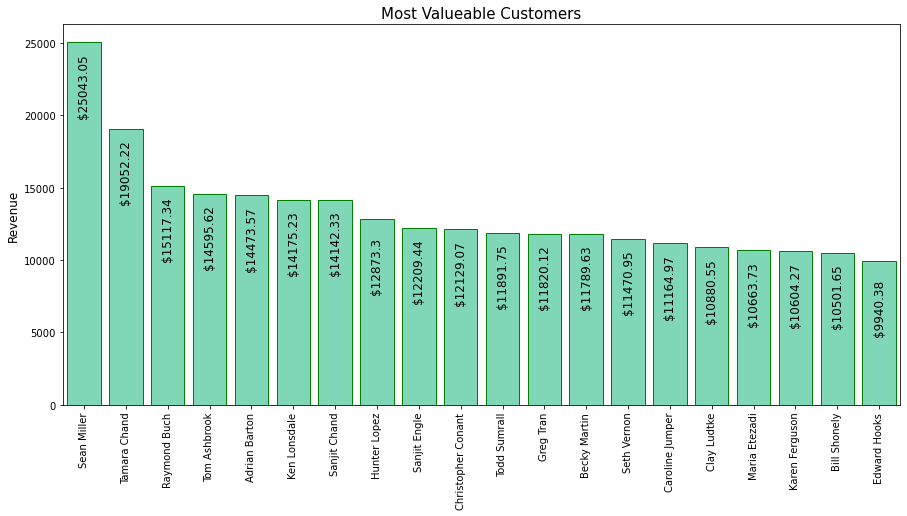

In [12]:
plt.figure(figsize=(15,7))
sns.barplot(data=top_customers, x='Customer Name', y='Sales', color='#70e6bb', edgecolor='green')
plt.title('Most Valueable Customers', size=15)
plt.xticks(rotation=90, size=10)
plt.xlabel('')
plt.ylabel('Revenue', size=12)
for c, n in top_customers['Sales'].items():
    plt.text(c, n-5000, '$'+str(round(n,2)),rotation=90, horizontalalignment='center',fontsize=12)
    
plt.show()

Dari tahun 2015 hingga akhir tahun 2018, inilah 20 customer yang melakukan pembelian terbanyak

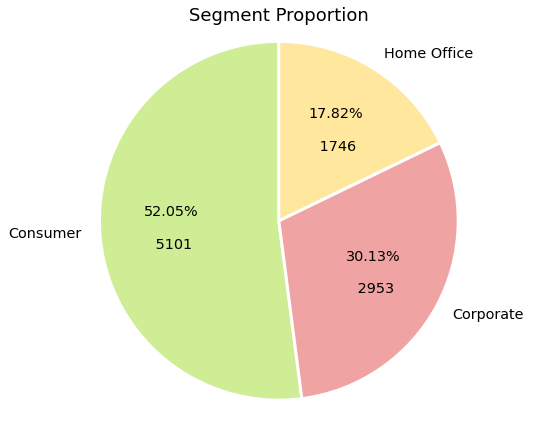

In [13]:
values = list(df['Segment'].value_counts().values)
labels = ['Consumer', 'Corporate', 'Home Office']
color = ['#ceed95','#f0a3a3','#ffe79e']

fig, ax = plt.subplots(figsize=(8,6))
ax.pie(values, labels=labels,  autopct=lambda p:f'{p:.2f}%\n\n {p*sum(values)/100 :.0f}' ,colors=color,
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},
       startangle=90)
ax.set_title('Segment Proportion', size=18)
ax.axis('equal')
plt.tight_layout()
plt.show()

Dari tahun 2015 hingga akhir tahun 2018, Proporsi segmen costumer kita sebanyak 52% nya berasal dari segmen consumer atau perorangan, di ikuti dengan segmen corporate sebesar 30% lalu Home Office sebesar 18%

# States & City

In [14]:
state_mean = df.groupby('State')[['Sales']].sum()
state_mean.describe()

,Sales
count,49.000000
mean,46153.811892
std,79088.812263
min,919.910000
25%,7464.930000
50%,22205.150000
75%,48219.110000
max,446306.463500


In [15]:
city_mean = df.groupby('City')[['Sales']].sum()
city_mean.describe()

,Sales
count,529.000000
mean,4275.116791
std,16724.369429
min,1.392000
25%,231.852000
50%,893.240000
75%,2722.260000
max,252462.547000


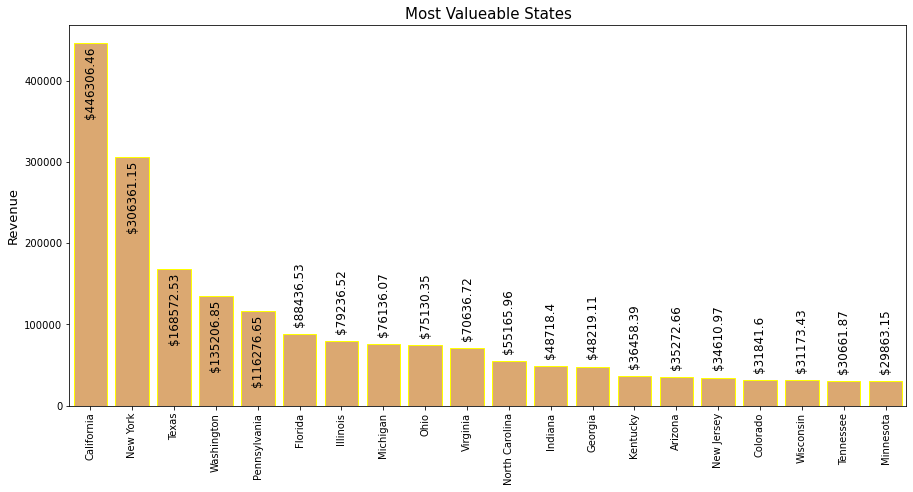

In [16]:
top_states = df.groupby('State')[['Sales']].sum().sort_values('Sales', ascending=False).head(20).reset_index()

plt.figure(figsize=(15,7))
sns.barplot(data=top_states, x='State', y='Sales', color='#eda85f', edgecolor='yellow')
plt.title('Most Valueable States', size=15)
plt.xticks(rotation=90, size=10)
plt.xlabel('')
plt.ylabel('Revenue', size=13)
for c, n in top_states['Sales'].items():
    if n > 100000:
        plt.text(c, n-90000, '$'+str(round(n,2)),rotation=90, horizontalalignment='center',fontsize=12)
    else:
        plt.text(c, n+12500, '$'+str(round(n,2)),rotation=90, horizontalalignment='center',fontsize=12)
    
    
plt.show()

Sepanjang tahun 2015 hingga akhir tahun 2018 California dan New York menghasilkan revenue lebih dari $300000. Ini menjadi 2 negara bagian yang menghasilkan revenue paling tinggi dari beberapa negara bagian lainnya

Kita akan lakukan analisis mendalam untuk beberapa negara bagian yang menghasilkan revenue lebih dari $300000, diantaranya California, New York dan Texas

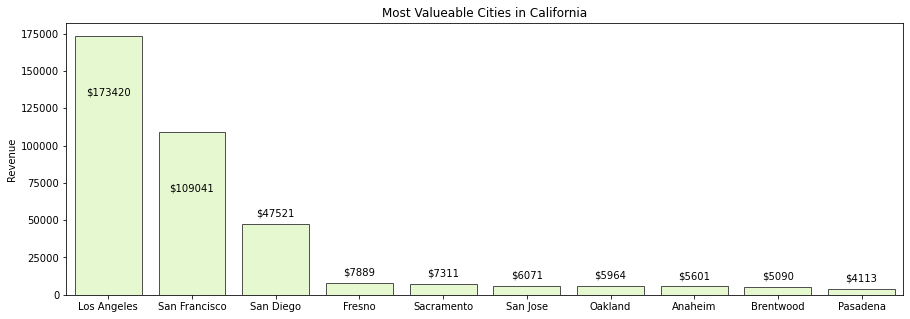

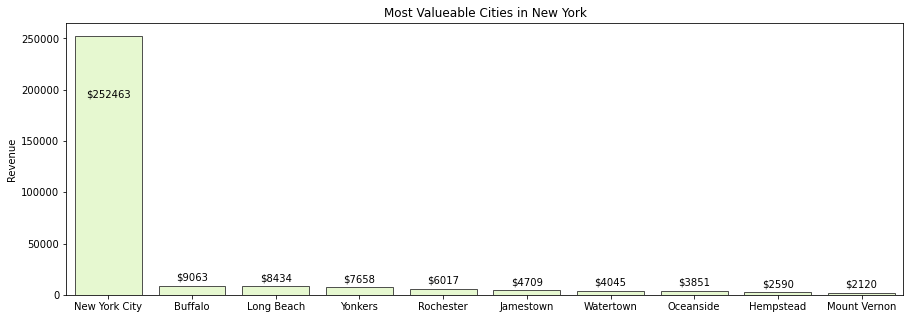

In [17]:
top_states = ['California','New York']


for i in top_states:
    plt.figure(figsize=(15,5))
    top_cities_tmp = df.groupby(df[df['State'] == i]['City'])[['Sales']].sum().sort_values('Sales', ascending=False).head(10).reset_index()
    sns.barplot(data=top_cities_tmp, x='City', y='Sales', color='#e7ffc9', edgecolor='#51524f')
    plt.title('Most Valueable Cities in {}'.format(i))
#     plt.xticks(rotation=90, size=10)
    plt.xlabel('')
    plt.ylabel('Revenue')
    for c, n in top_cities_tmp['Sales'].items():
        if n > 200000:
            plt.text(c, n-60000, '$'+str(round(n)), horizontalalignment='center',fontsize=10)
        elif n > 100000:
            plt.text(c, n-40000, '$'+str(round(n)), horizontalalignment='center',fontsize=10)        
        elif n > 50000:
            plt.text(c, n-15000, '$'+str(round(n)), horizontalalignment='center',fontsize=10)
        else:
            plt.text(c, n+5000, '$'+str(round(n)), horizontalalignment='center',fontsize=10)

plt.show()

Dari dua negara bagian yang menghasilkan revenue cukup tinggi ternyata revenue yang di hasilkan cukup besar hanya terjadi di beberapa kota besar saja dan tidak menyeluruh di seluruh kota negara bagian tersebut

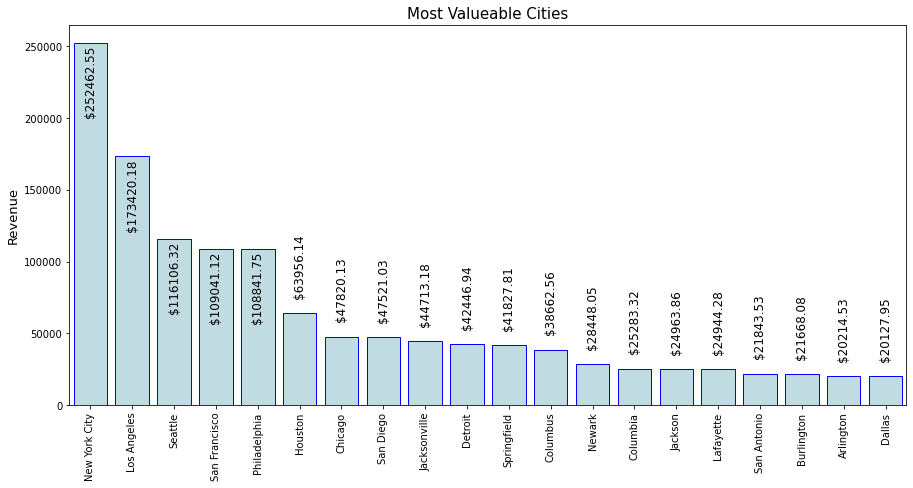

In [18]:
top_cities = df.groupby('City')[['Sales']].sum().sort_values('Sales', ascending=False).head(20).reset_index()

plt.figure(figsize=(15,7))
sns.barplot(data=top_cities, x='City', y='Sales', color='#bae0e8', edgecolor='blue')
plt.title('Most Valueable Cities', size=15)
plt.xticks(rotation=90, size=10)
plt.xlabel('')
plt.ylabel('Revenue', size=13)
for c, n in top_cities['Sales'].items():
    if n > 100000:
        plt.text(c, n-50000, '$'+str(round(n,2)),rotation=90, horizontalalignment='center',fontsize=12)
    else:
        plt.text(c, n+12500, '$'+str(round(n,2)),rotation=90, horizontalalignment='center',fontsize=12)
    
    
plt.show()

Adapun ini adalah 20 kota yang menghasilkan revenue cukup tinggi dari beberapa kota lainnya yang menghasilkan lebih dari $20000 sepanjang tahun 2015 hingga akhir tahun 2018

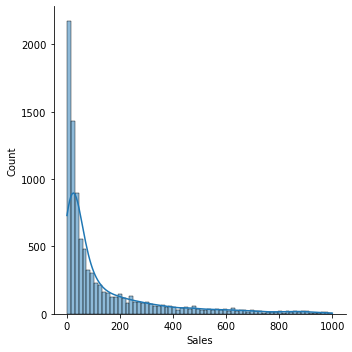

In [19]:
sns.displot(data=df[df['Sales'] <= 1000] , x='Sales', kde=True)

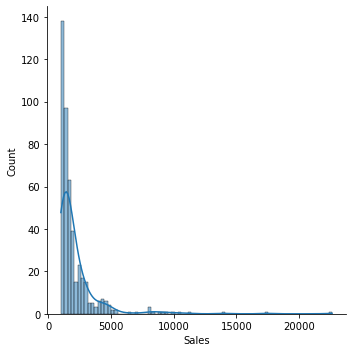

In [20]:
sns.displot(data=df[df['Sales'] > 1000] , x='Sales', kde=True)

# Category & Product

In [21]:
group_category = df.groupby('Category')[['Sales']].sum().reset_index()
group_category.sort_values('Sales', ascending=False)

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


In [22]:
df.groupby('Category')[['Order ID']].count().reset_index().sort_values('Order ID', ascending=False)

,Category,Order ID
1,Office Supplies,5909
0,Furniture,2078
2,Technology,1813


Walaupun secara jumlah produk yang terjual berdasarkan kategori, Office Suplies dan Furniture lebih tinggi dari Technology, namun secara Sales, kategori technology menghasilkan revenue lebih besar dari 2 kategori lainnya.

In [250]:
top5_tech = df[df['Category'] == 'Technology'].groupby('Product Name')[['Sales']].sum().reset_index()
top5_tech.sort_values('Sales', ascending=False, inplace=True)

In [243]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

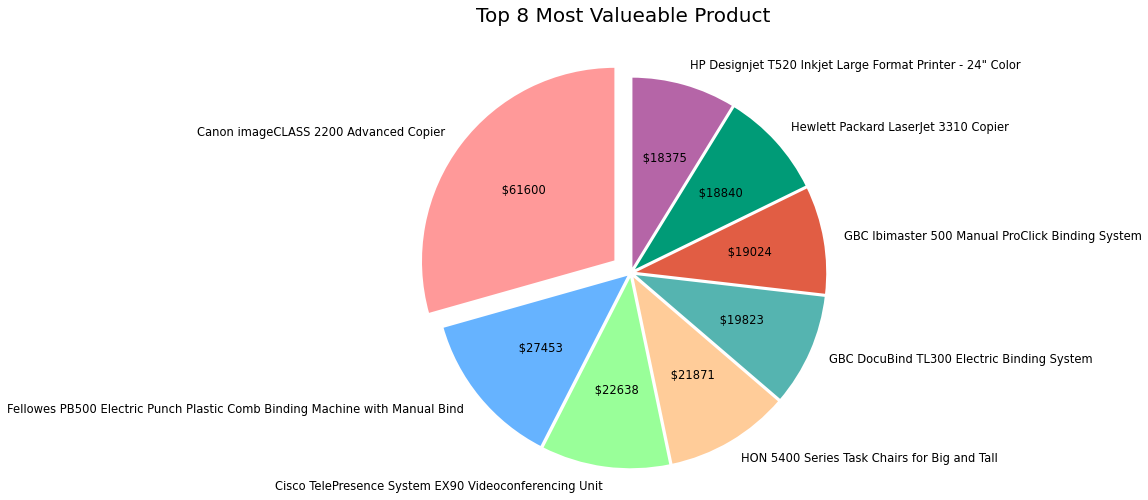

In [248]:
top_product = df.groupby('Product Name')[['Sales']] .sum().sort_values('Sales', ascending=False).reset_index().head(8)


color = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77','#B565A7']

fig, ax = plt.subplots(figsize=(13,7))
ax.pie(round(top_product['Sales']) , labels=top_product['Product Name'],
       autopct=autopct_format(top_product['Sales']),
       colors=color,
       wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'},
       startangle=90,
       explode = (0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.01))

ax.set_title('Top 8 Most Valueable Product', size=20, pad=25)
ax.axis('equal')
plt.tight_layout()
plt.rcParams.update({'font.size': 8})
plt.show()

Dari plot diatas dapat kita lihat 8 produk yang menghasilkan revenue tertinggi dari beberapa produk lainnya

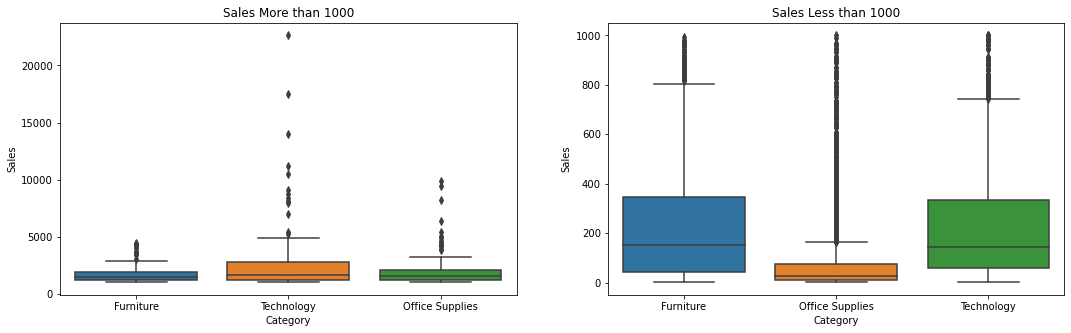

In [23]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18,5))
sns.boxplot(data=df[df['Sales']>=1000] , x='Category', y='Sales', ax=ax[0])
sns.boxplot(data=df[df['Sales']<1000] , x='Category', y='Sales', ax=ax[1])
ax=ax.flatten()
ax[0].set_title('Sales More than 1000')
ax[1].set_title('Sales Less than 1000')
plt.show()

Dapat dilihat secara visual alasan mengapa kategori Technology bisa lebih unggul dalam menghasilkan revenue adalah karena hasil Sales atau mungkin harga dari masing-masing produk kategori technology lebih tinggi di banding dengan harga produk dari kategori lain.

In [100]:
top5 = ['New York City','Los Angeles', 'Seattle', 'San Francisco','Philadelphia']
df_top5 = df[df['City'].isin(top5)].groupby(['City','Category'])[['Sales']].count().reset_index()
df_top5 = df_top5.rename(columns={'Sales':'Sold'})
df_top5['Sales'] = df[df['City'].isin(top5)].groupby(['City', 'Category'])[['Sales']].sum().reset_index()['Sales']

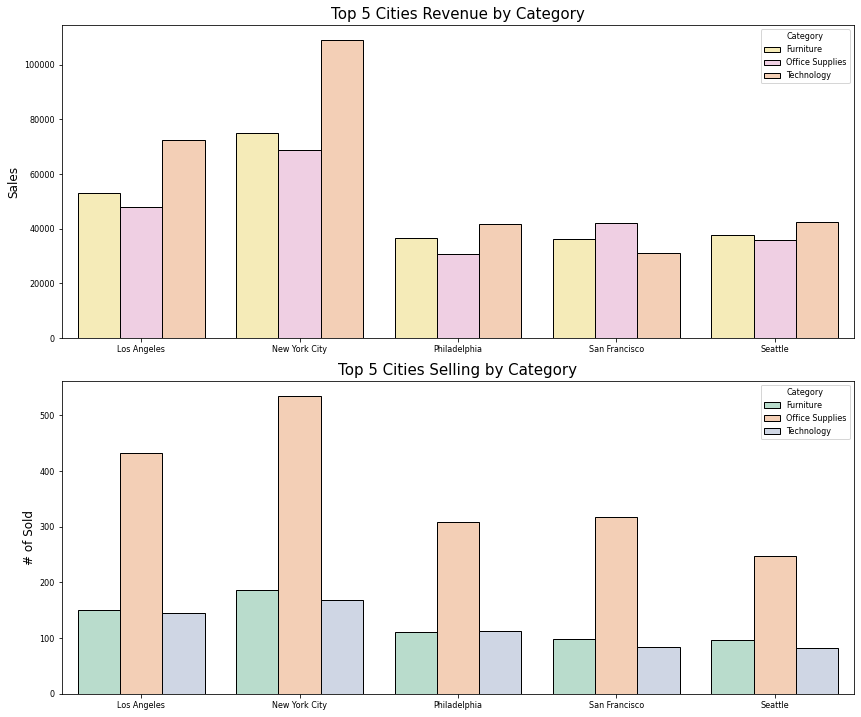

In [294]:
fig, ax = plt.subplots(nrows=2, figsize=(12,10))
sns.barplot(data=df_top5, x='City', y='Sales', hue='Category',palette='Pastel2_r', edgecolor='black' , ax=ax[0])
sns.barplot(data=df_top5, x='City',y='Sold', hue='Category',palette='Pastel2' ,edgecolor='black' , ax=ax[1])
ax[0].set_title('Top 5 Cities Revenue by Category', size=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Sales', size=12)
ax[1].set_title('Top 5 Cities Selling by Category', size=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('# of Sold', size=12)
plt.tight_layout()
plt.show()

Dapat kita lihat dari kelima negara yang menghasilkan revenue tertinggi ini, produk dengan kategori Technology menghasilkan revenue paling tinggi dari kategori lain di setiap negaranya kecuali di san francisco

Namun secara quantity penjualan, produk yang paling banyak terjual justru produk dengan kategori Office Suplies di bandingkan dengan produk Technology

Ini terjadi kemungkinan di sebabkan oleh harga dari produk Technology memiliki harga yang jauh lebih tinggi di bandingkan dengan produk Office Supplies dan Furniture

In [261]:
df_productin_top5 = df[df['City'].isin(top5)].groupby(['City','Category', 'Sub-Category'])[['Product ID']].count().reset_index()
df_productin_top5['Sales'] = df[df['City'].isin(top5)].groupby(['City','Category', 'Sub-Category'])[['Sales']].sum().reset_index()['Sales']
df_productin_top5

,City,Category,Sub-Category,Product ID,Sales
0,Los Angeles,Furniture,Bookcases,14,10154.865
1,Los Angeles,Furniture,Chairs,45,17654.624
2,Los Angeles,Furniture,Furnishings,62,6275.860
3,Los Angeles,Furniture,Tables,30,19058.536
4,Los Angeles,Office Supplies,Appliances,36,8534.230
...,...,...,...,...,...
80,Seattle,Office Supplies,Supplies,8,457.990
81,Seattle,Technology,Accessories,45,13087.980
82,Seattle,Technology,Copiers,3,17449.880
83,Seattle,Technology,Machines,5,4188.560


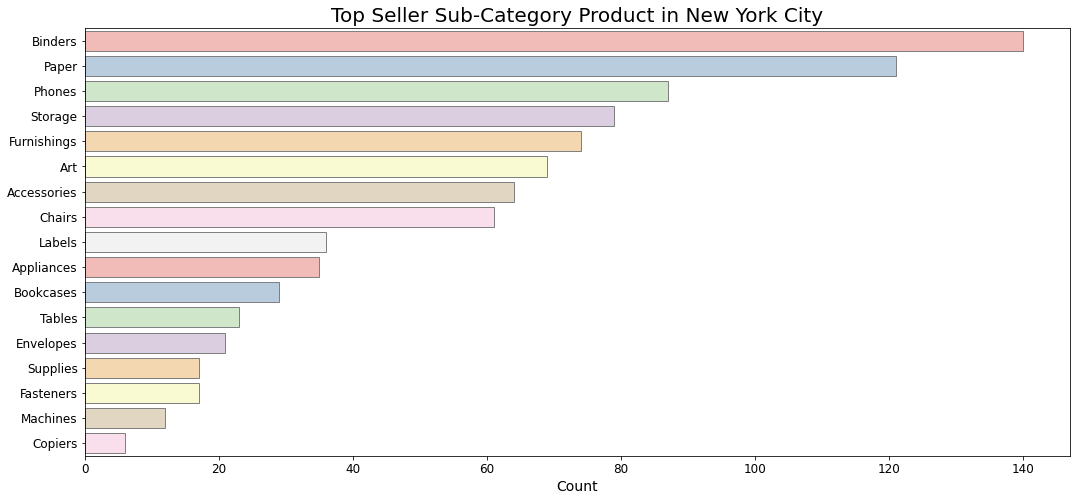

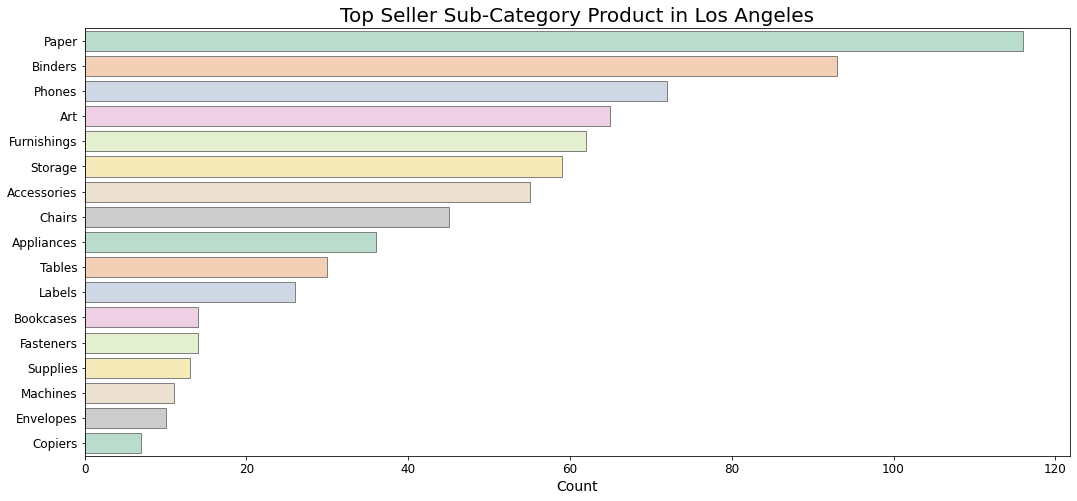

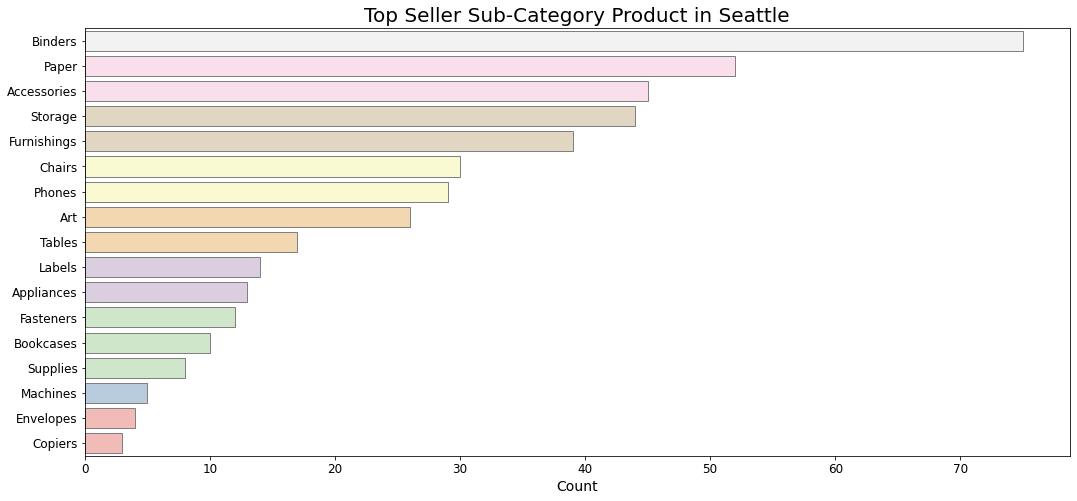

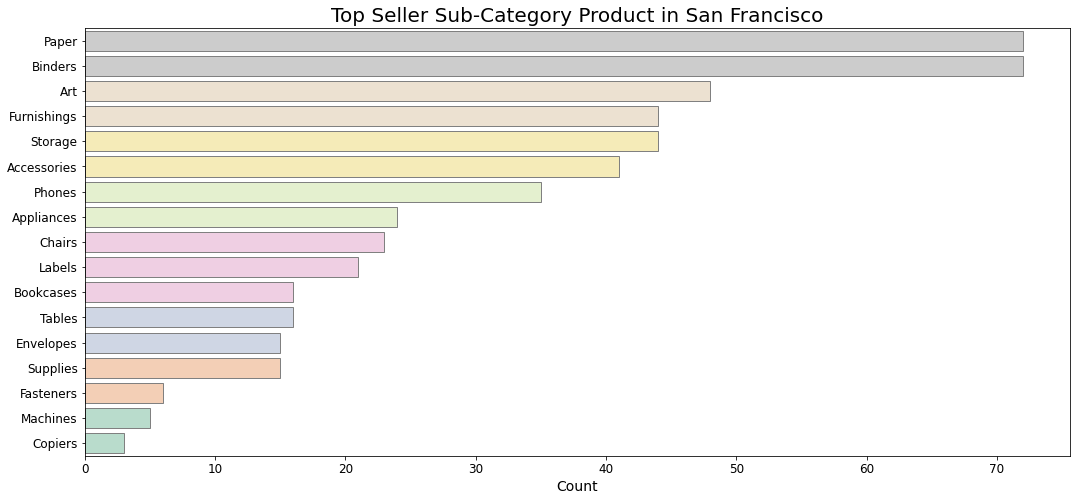

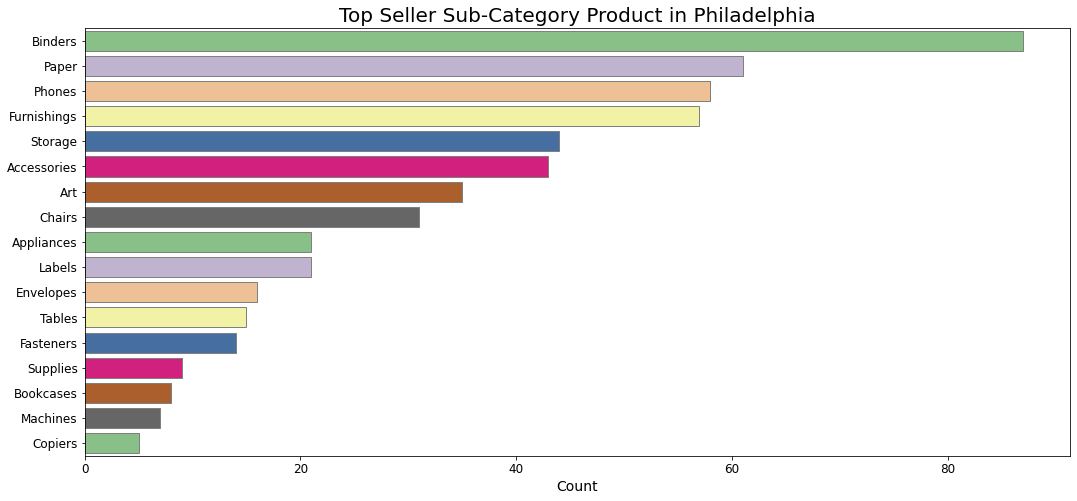

In [311]:
palette = ['Pastel1','Pastel2', 'Pastel1_r','Pastel2_r','Accent']
i=0
for city in top5:

    plt.figure(figsize=(15,7))
    sns.barplot(data=df_productin_top5[df_productin_top5['City'] == city].sort_values('Product ID', ascending=False),
                y='Sub-Category',
                x='Product ID',
                palette=palette[i], edgecolor='gray')
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title('Top Seller Sub-Category Product in {}'.format(city), size=20)
    plt.xlabel('Count', size=14)
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    i +=1

Dari bar plot diatas dapat kita lihat bahwa produk-produk yang paling banyak terjual dari 5 negara tersebut adalah produk-produk seperti Paper, Binders, Art, Phone, Furnishing dan Storage